In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
data=pd.read_csv('/content/medicsal.zip')

In [82]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [83]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [84]:
data.describe(include=['O'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [86]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [87]:
data.apply(pd.Series.nunique)

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [88]:
data['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [89]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

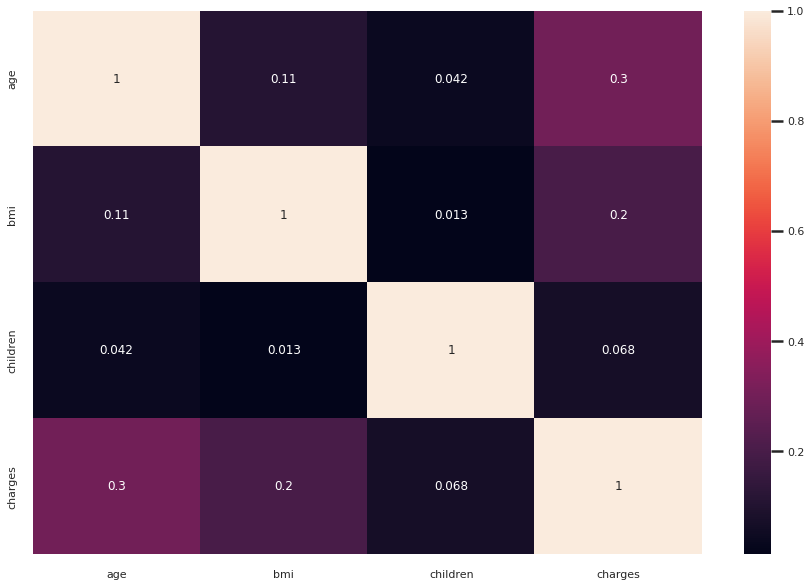

In [90]:
plt.figure(figsize=(15,10))
sns.set_context('poster', font_scale=0.5)
sns.heatmap(data.corr(), annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


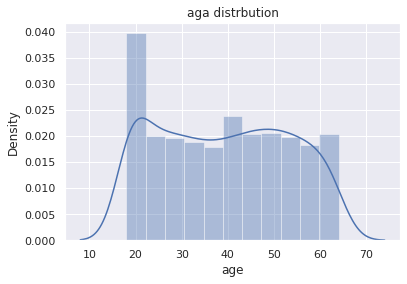

In [91]:
sns.set()
sns.distplot(data['age'])
plt.title('aga distrbution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


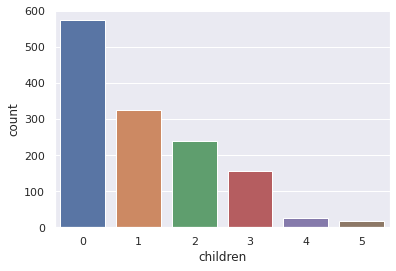

In [92]:
sns.countplot(data['children'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


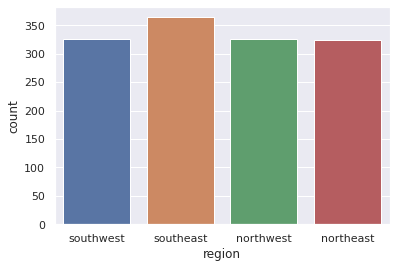

In [93]:
sns.countplot(data['region'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


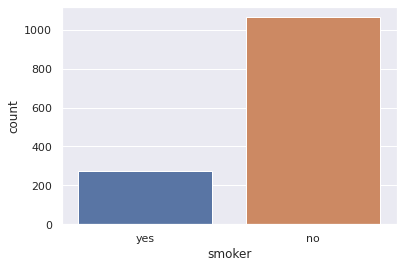

In [94]:
sns.countplot(data['smoker'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


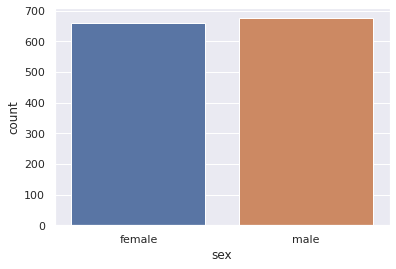

In [95]:

sns.countplot(data['sex'])



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


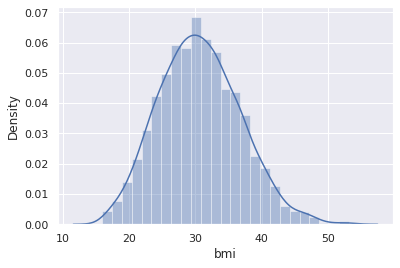

In [96]:
sns.distplot(data['bmi'])

In [97]:
data['bmi'].skew()

0.2840471105987448

In [98]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [99]:
data['Smoker']=pd.get_dummies(data['smoker'],drop_first=True)

data

,age,sex,bmi,children,smoker,region,charges,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [100]:
data.drop('smoker',axis=1,inplace=True)
data

,age,sex,bmi,children,region,charges,Smoker
0,19,female,27.900,0,southwest,16884.92400,1
1,18,male,33.770,1,southeast,1725.55230,0
2,28,male,33.000,3,southeast,4449.46200,0
3,33,male,22.705,0,northwest,21984.47061,0
4,32,male,28.880,0,northwest,3866.85520,0
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,0
1334,18,female,31.920,0,northeast,2205.98080,0
1335,18,female,36.850,0,southeast,1629.83350,0
1336,21,female,25.800,0,southwest,2007.94500,0


In [101]:
data['sex']=pd.get_dummies(data['sex'],drop_first=True)
data

,age,sex,bmi,children,region,charges,Smoker
0,19,0,27.900,0,southwest,16884.92400,1
1,18,1,33.770,1,southeast,1725.55230,0
2,28,1,33.000,3,southeast,4449.46200,0
3,33,1,22.705,0,northwest,21984.47061,0
4,32,1,28.880,0,northwest,3866.85520,0
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,northwest,10600.54830,0
1334,18,0,31.920,0,northeast,2205.98080,0
1335,18,0,36.850,0,southeast,1629.83350,0
1336,21,0,25.800,0,southwest,2007.94500,0


In [102]:

data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [103]:
#data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
data['region']= label_encoder.fit_transform(data['region'])
 
data['region'].unique()

array([3, 2, 1, 0])

In [104]:
data.head()

,age,sex,bmi,children,region,charges,Smoker
0,19,0,27.900,0,3,16884.92400,1
1,18,1,33.770,1,2,1725.55230,0
2,28,1,33.000,3,2,4449.46200,0
3,33,1,22.705,0,1,21984.47061,0
4,32,1,28.880,0,1,3866.85520,0


In [105]:
y=data['charges']



In [106]:
data

,age,sex,bmi,children,region,charges,Smoker
0,19,0,27.900,0,3,16884.92400,1
1,18,1,33.770,1,2,1725.55230,0
2,28,1,33.000,3,2,4449.46200,0
3,33,1,22.705,0,1,21984.47061,0
4,32,1,28.880,0,1,3866.85520,0
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,10600.54830,0
1334,18,0,31.920,0,0,2205.98080,0
1335,18,0,36.850,0,2,1629.83350,0
1336,21,0,25.800,0,3,2007.94500,0


In [107]:
data

,age,sex,bmi,children,region,charges,Smoker
0,19,0,27.900,0,3,16884.92400,1
1,18,1,33.770,1,2,1725.55230,0
2,28,1,33.000,3,2,4449.46200,0
3,33,1,22.705,0,1,21984.47061,0
4,32,1,28.880,0,1,3866.85520,0
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,10600.54830,0
1334,18,0,31.920,0,0,2205.98080,0
1335,18,0,36.850,0,2,1629.83350,0
1336,21,0,25.800,0,3,2007.94500,0


In [131]:
X=data.drop(columns='charges', axis=1)
X=(X-np.min(X))/(np.max(X)-np.min(X)).values
X

,age,sex,bmi,children,region,Smoker
0,0.021739,0.0,0.321227,0.0,1.000000,1.0
1,0.000000,1.0,0.479150,0.2,0.666667,0.0
2,0.217391,1.0,0.458434,0.6,0.666667,0.0
3,0.326087,1.0,0.181464,0.0,0.333333,0.0
4,0.304348,1.0,0.347592,0.0,0.333333,0.0
...,...,...,...,...,...,...
1333,0.695652,1.0,0.403820,0.6,0.333333,0.0
1334,0.000000,0.0,0.429379,0.0,0.000000,0.0
1335,0.000000,0.0,0.562012,0.0,0.666667,0.0
1336,0.065217,0.0,0.264730,0.0,1.000000,0.0


In [125]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [126]:
from sklearn.model_selection import train_test_split


In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)
from sklearn.linear_model import LinearRegression

In [128]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [129]:
model.score(X_train,Y_train)

0.7519923667088932

In [130]:
model.score(X_test,Y_test)

0.7445422986536503